# Predicting Practice of Exercise During

## Importing packages

In [1]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 2.03 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 0.82 seconds)
Iteration 100: error is 57.596822 (50 iterations in 0.97 seconds)
Iteration 150: error is 57.596822 (50 iterations in 0.90 seconds)
Iteration 200: error is 57.596822 (50 iterations in 1.35 seconds)
Iteration 250: error is 57.596830 (50 iterations in 2.01 seconds)
Iteration 300: error is 2.314829 (50 iterations in 2.47 seconds)
Iteration 350: error is 1.308008 (50 iterations in 0.94 seconds)
Iteration 400: error is 1.263160 (50 iterations in 0.69 seconds)
Iteration 450: error is 1.258562 (50 iterations in 0.66 seconds)
Iteration 500: error is 1.254343 (50 iterations in 0.76 seconds)
Iteration 550: error is 1.251567 (50 iterations in 0.54 seconds)
Iteration 6

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

## Outliers

#### Outlier: Strange Dont Practice

In [2]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp, pa_dataset_copy, "PA_practice_during")

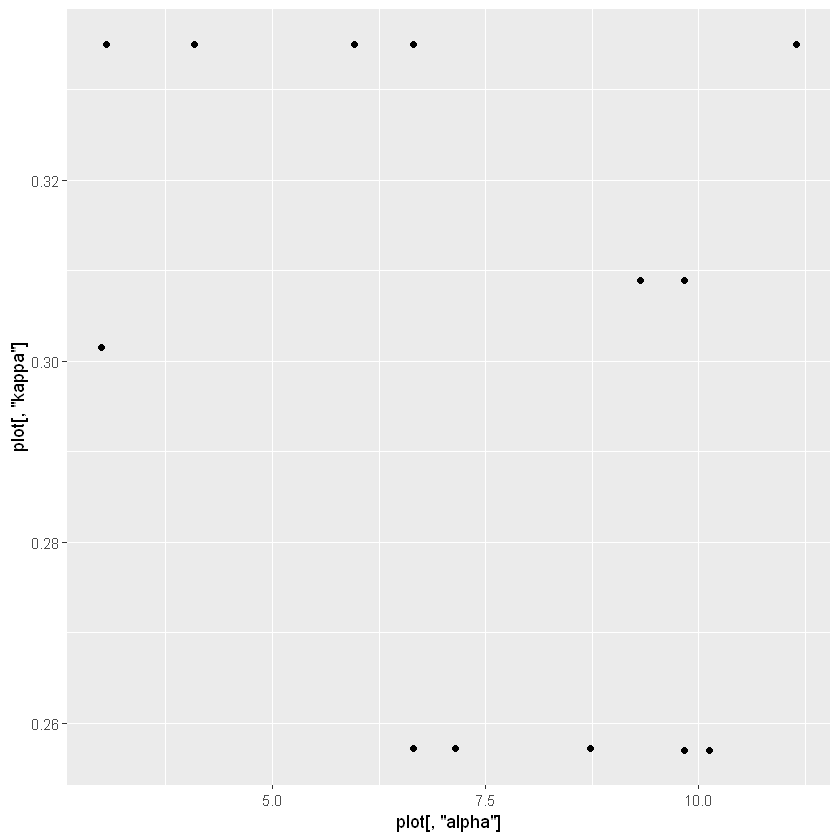

In [3]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### Outlier: Strange Practice

In [4]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp, pa_dataset_copy, "PA_practice_during")

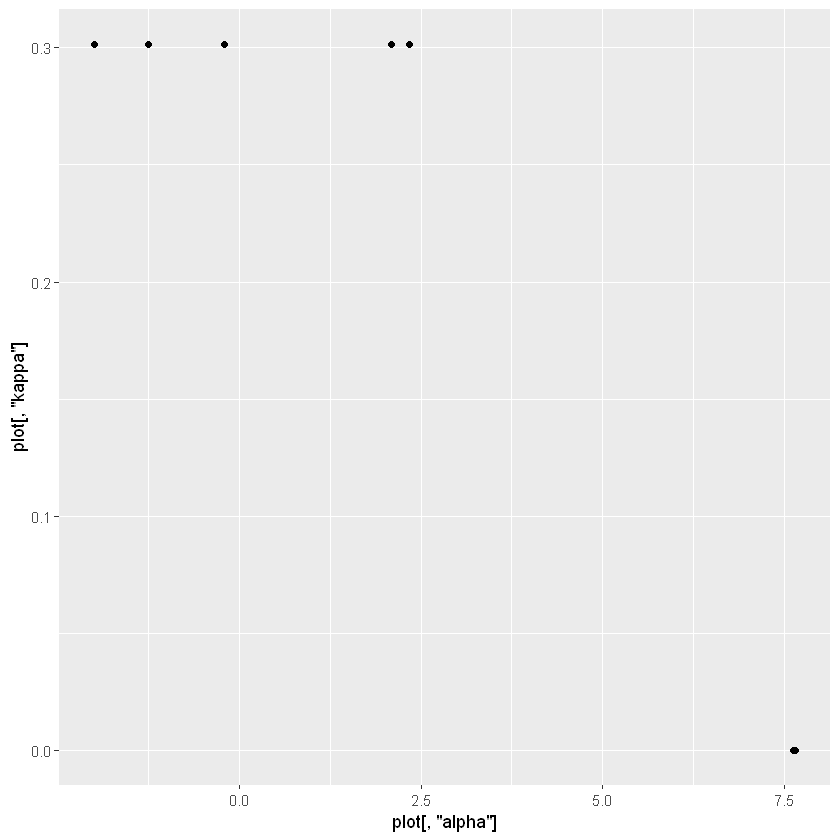

In [5]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### New Train and Test
The outliers check in the strange dont practice showed that we should delete 1 record

In [6]:
pa_train <- outliers_result_sdp$best_model$train
pa_test <- outliers_result_sdp$best_model$test

## Models

In [7]:
dim(pa_dataset)

[1] 1242   74

In [8]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          346           896 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set

In [9]:
set.seed(2)
pa_train.aug <- data_augmentation(
    train_data=pa_train,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(pa_train.aug[, "PA_practice_during"])



dont_practice      practice 
          628           628 

### Decision Tree: Kappa Metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            50       43
  practice                 53      225
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.2267          
                                          
                  Kappa : 0.335           
                                          
 Mcnemar's Test P-Value : 0.3583          
                                          
            Sensitivity : 0.4854          
            Specificity : 0.8396          
         Pos Pred Value : 0.5376          
         Neg Pred Value : 0.8094          
              Precision : 0.5376          
                 Recall : 0.4854          
                     F1 : 0.5102          
             Prevalence : 0.2776          
         Detection Rate : 0.1348          
   Detec

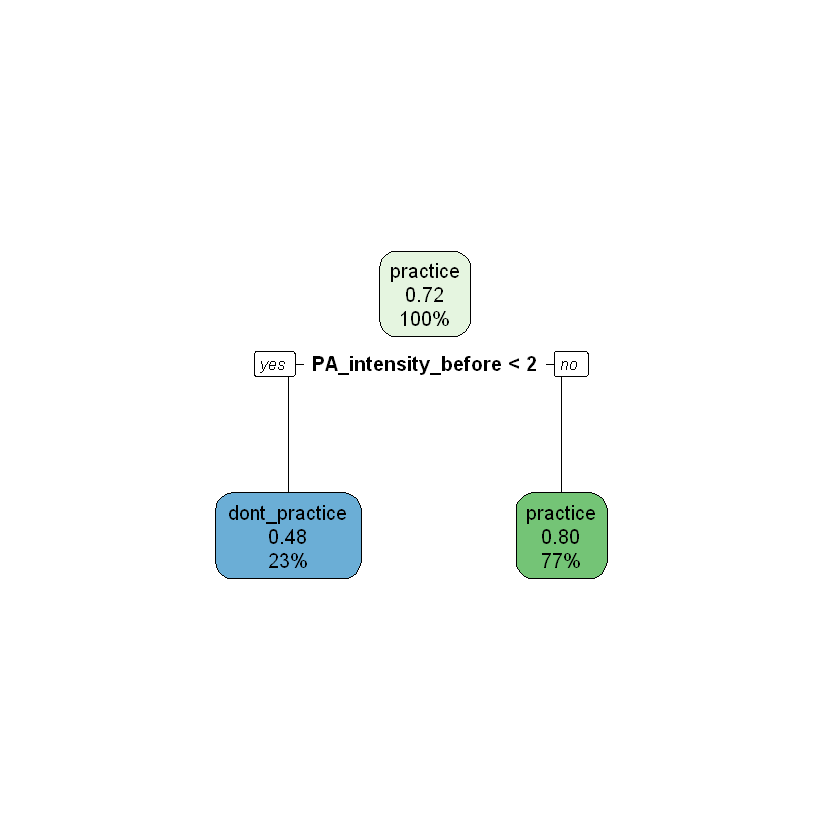

In [10]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_train,
    test_data= pa_test,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)

rpart.plot(model$result$finalModel)
roc_dt_na <- model$probDF

### Decision Tree: Kappa Metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            10       33
  practice                 93      235
                                          
               Accuracy : 0.6604          
                 95% CI : (0.6097, 0.7085)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.9963          
                                          
                  Kappa : -0.0317         
                                          
 Mcnemar's Test P-Value : 1.471e-07       
                                          
            Sensitivity : 0.09709         
            Specificity : 0.87687         
         Pos Pred Value : 0.23256         
         Neg Pred Value : 0.71646         
              Precision : 0.23256         
                 Recall : 0.09709         
                     F1 : 0.13699         
             Prevalence : 0.27763         
         Detection Rate : 0.02695         
   Detec

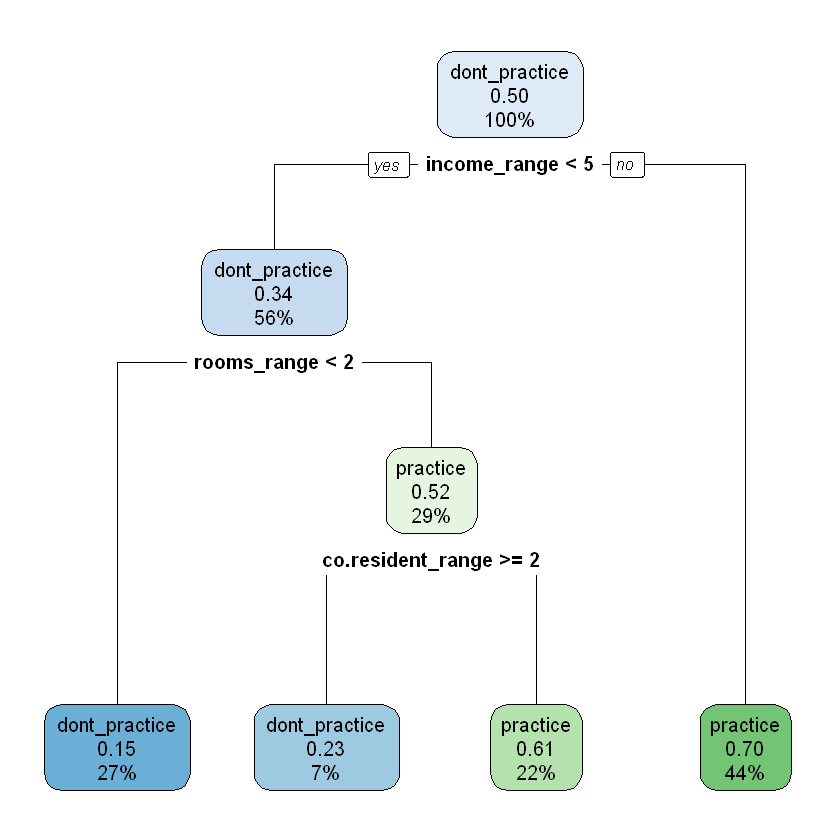

In [11]:

set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)
roc_dt_a <- model$probDF

### RF: Kappa Metric without augmentation


In [12]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_train,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            44       17
  practice                 59      251
                                          
               Accuracy : 0.7951          
                 95% CI : (0.7504, 0.8351)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.0007959       
                                          
                  Kappa : 0.416           
                                          
 Mcnemar's Test P-Value : 2.563e-06       
                                          
            Sensitivity : 0.4272          
            Specificity : 0.9366          
         Pos Pred Value : 0.7213          
         Neg Pred Value : 0.8097          
              Precision : 0.7213          
                 Recall : 0.4272          
                     F1 : 0.5366          
             Prevalence : 0.2776          
         Detection Rate : 0.1186          
   Detec

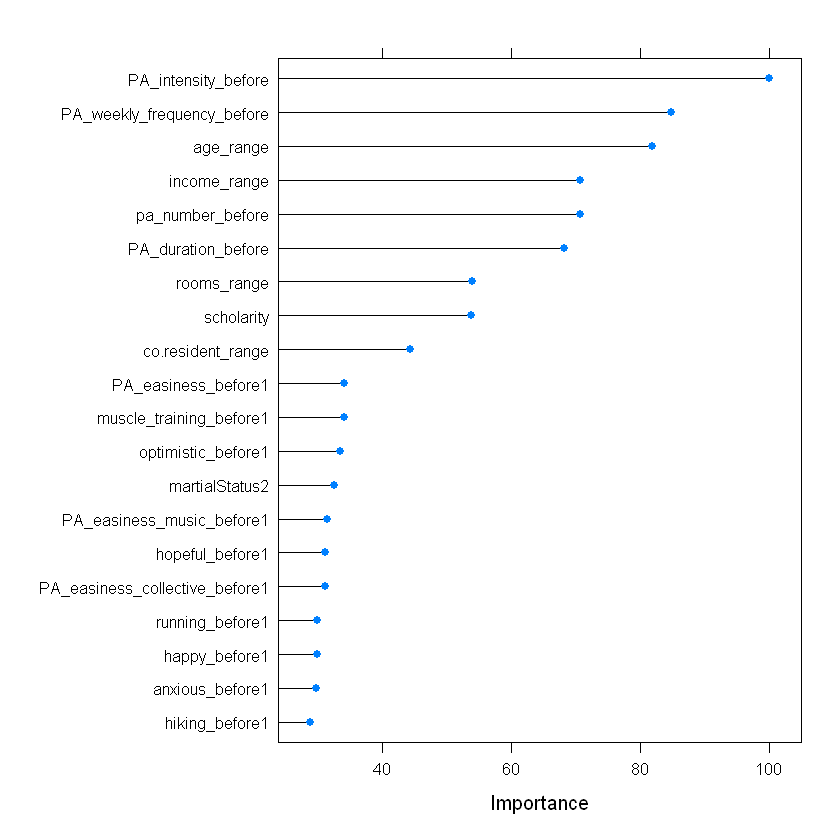

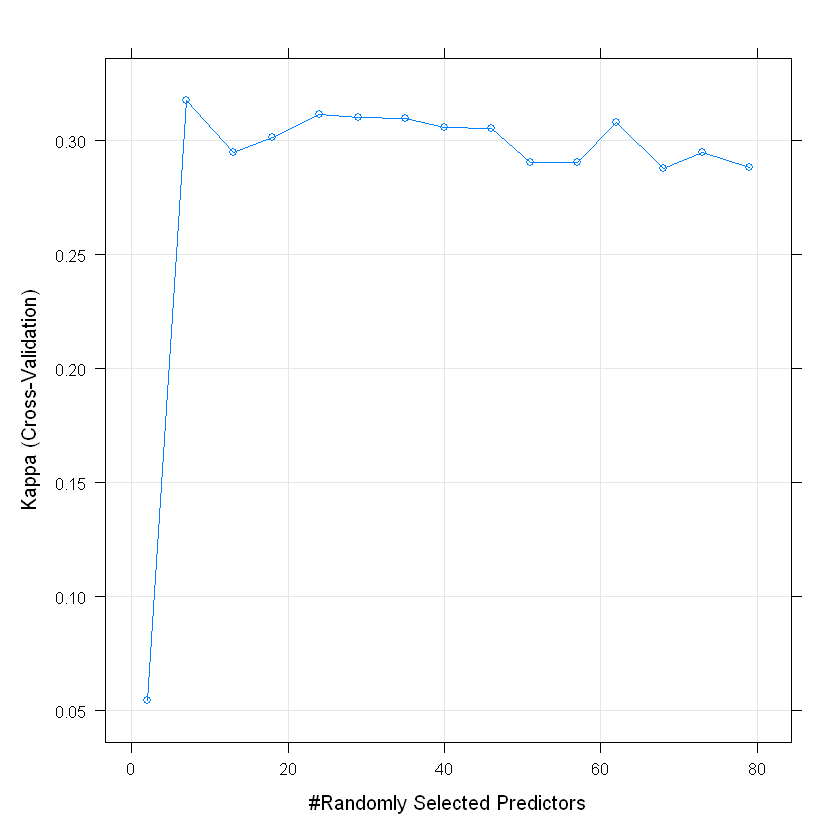

In [13]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: Kappa metric with augmentation

In [14]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            46       22
  practice                 57      246
                                          
               Accuracy : 0.7871          
                 95% CI : (0.7418, 0.8276)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.0026512       
                                          
                  Kappa : 0.4071          
                                          
 Mcnemar's Test P-Value : 0.0001306       
                                          
            Sensitivity : 0.4466          
            Specificity : 0.9179          
         Pos Pred Value : 0.6765          
         Neg Pred Value : 0.8119          
              Precision : 0.6765          
                 Recall : 0.4466          
                     F1 : 0.5380          
             Prevalence : 0.2776          
         Detection Rate : 0.1240          
   Detec

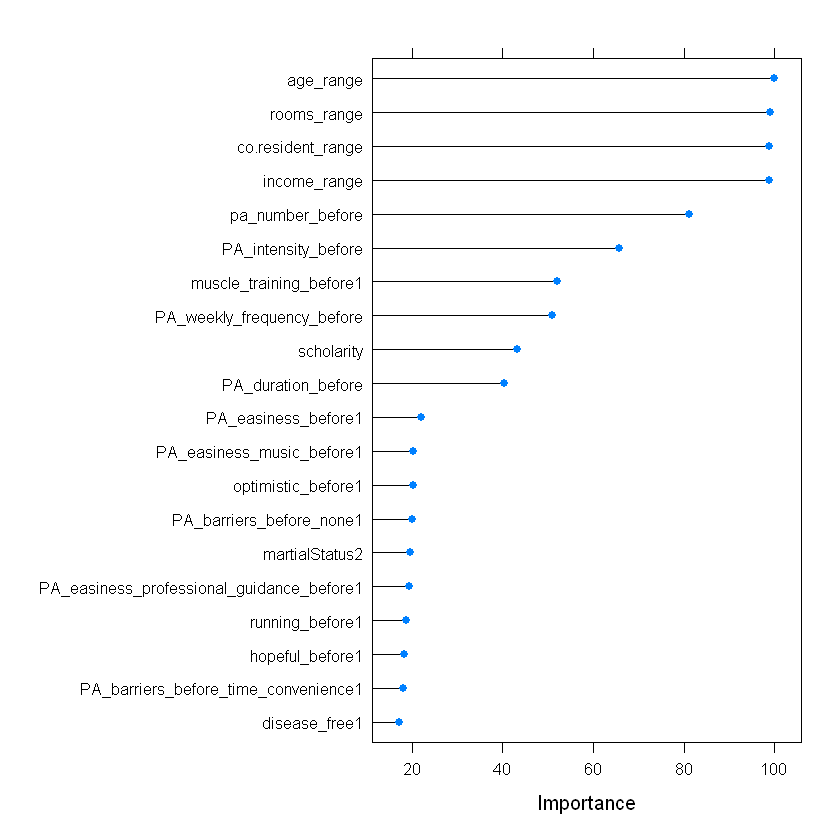

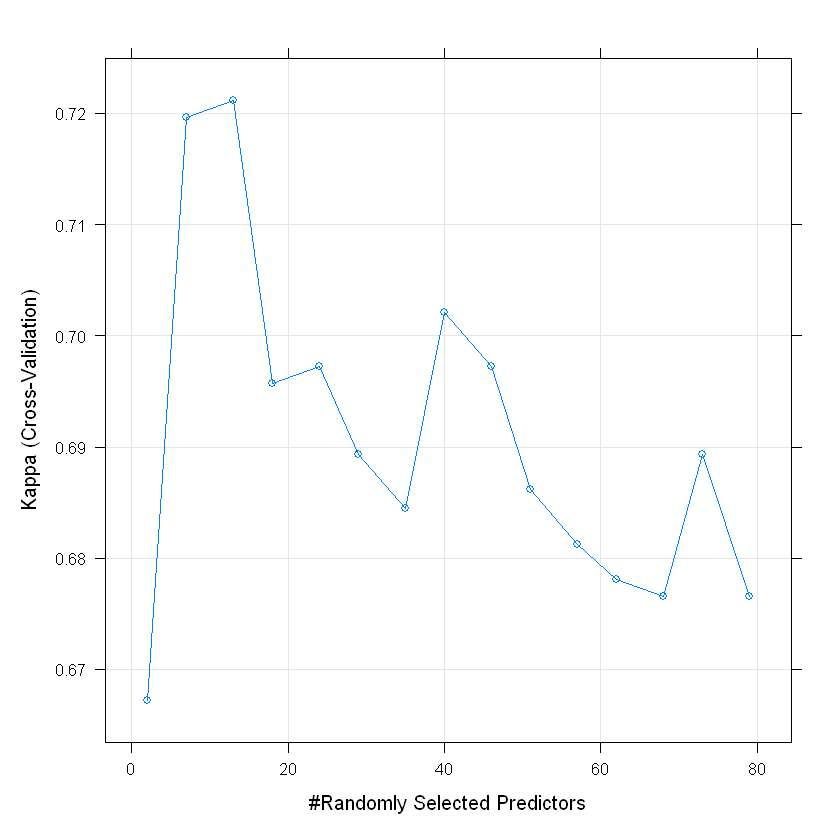

In [15]:
plot(varImp(model$result), top=20)
plot(model$result)
